<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-11" data-toc-modified-id="Exercise-11-1">Exercise 11</a></span></li><li><span><a href="#(a)-Create-0/1-response." data-toc-modified-id="(a)-Create-0/1-response.-2">(a) Create 0/1 response.</a></span></li><li><span><a href="#(b)-Explore-graphically" data-toc-modified-id="(b)-Explore-graphically-3">(b) Explore graphically</a></span></li><li><span><a href="#(c)-Train-test-split-(3:1)" data-toc-modified-id="(c)-Train-test-split-(3:1)-4">(c) Train-test split (3:1)</a></span></li><li><span><a href="#(d-g)-LDA,-QDA,-LogReg,-KNN-by-'weight'" data-toc-modified-id="(d-g)-LDA,-QDA,-LogReg,-KNN-by-'weight'-5">(d-g) LDA, QDA, LogReg, KNN by 'weight'</a></span></li></ul></div>

# Exercise 11
##### In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_palette('bone')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from util import get_data

In [2]:
data = get_data('Auto.csv')
data = data.replace('?', np.nan)
data = data.set_index('name', drop=True)
data = data.astype('float')

# (a) Create 0/1 response.
##### Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may ﬁnd it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

In [3]:
data['mpg01'] = (data.mpg >= data.mpg.median()).astype(int)
data = data.drop(columns='mpg')
data.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,
chevrolet chevelle malibu,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0
buick skylark 320,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0
plymouth satellite,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0
amc rebel sst,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0
ford torino,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0


# (b) Explore graphically
##### Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your ﬁndings.

,mpg01,predictor,value
0,0,cylinders,8.0
1,0,cylinders,8.0
2,0,cylinders,8.0
3,0,cylinders,8.0
4,0,cylinders,8.0


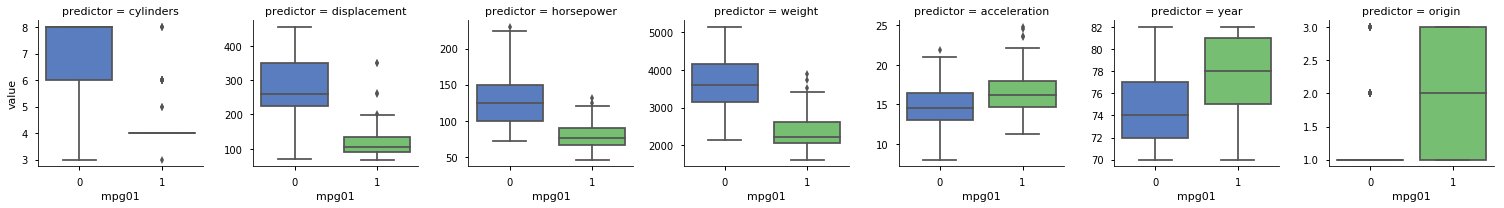

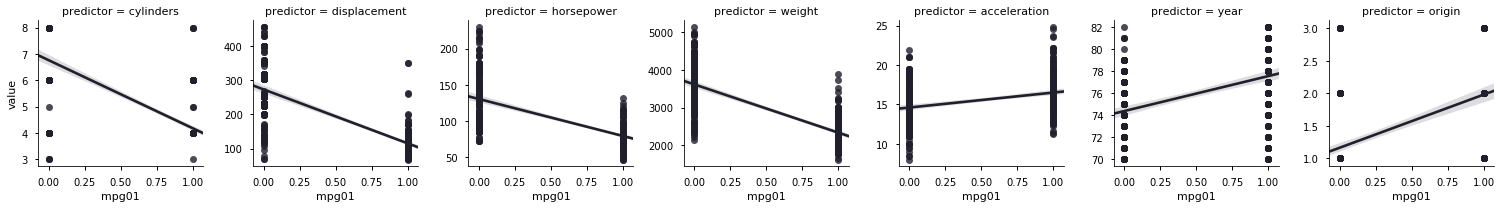

In [4]:
data_long = data.melt('mpg01', var_name='predictor')
display(data_long.head())

g = sns.FacetGrid(data_long, col='predictor', sharey=False)
g = g.map(sns.boxplot, 'mpg01', 'value', order=[0,1], palette="muted")

g = sns.FacetGrid(data_long, col='predictor', sharey=False)
g = g.map(sns.regplot, 'mpg01', 'value')

# (c) Train-test split (3:1)
##### Split the data into a training set and a test set.

In [5]:
X = data.drop(columns='mpg01')
y = data.mpg01
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))

Training set size: 297
Testing set size: 100


# (d-g) LDA, QDA, LogReg, KNN by 'weight'
##### Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

##### Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

##### Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

##### Perform KNN on the training data, with several values of K, in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained? Which value of K seems to perform the best on this data set?

In [6]:
X_subset_train = X_train.weight.values.reshape(-1,1)
X_subset_test = X_test.weight.values.reshape(-1,1)

knlist = [1, 2, 4, 8, 16, 32]
clf_names = ['LDA', 'QDA', 'LogReg'] + ['KNN-'+str(kn) for kn in knlist]
clf_list = [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), LogisticRegression()] + [KNeighborsClassifier(kn) for kn in knlist]

for j, (method, clf) in enumerate(zip(clf_names, clf_list)):
    clf.fit(X_subset_train, y_train)
    print(method, 'test error:', 1 - accuracy_score(y_test, clf.predict(X_subset_test)))

LDA test error: 0.14
QDA test error: 0.14
LogReg test error: 0.13
KNN-1 test error: 0.15000000000000002
KNN-2 test error: 0.14
KNN-4 test error: 0.16000000000000003
KNN-8 test error: 0.14
KNN-16 test error: 0.12
KNN-32 test error: 0.13


High k values perform best on this data